<font size=8>**Visualizing a trend in the required US data analyst skills**<font>

**Importing the necessary libraries and cleaning the dataframe**

In [9]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\vbali\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Jul 24 13:39:16 2024).


**Filtering for US Data Analyst job postings**

In [10]:
df_da_hu = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

**Extracting the month numbers from 'job_posted_date'**

In [11]:
df_da_hu['job_posted_month']=df_da_hu['job_posted_date'].dt.month
df_da_hu_explode = df_da_hu.explode('job_skills')

**Creating a pivot table: job skills by months**

In [12]:
df_da_hu_piv=df_da_hu_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

**Adding an aggragated 'Total' row to the pivot table**

In [13]:
df_da_hu_piv.loc['Total']=df_da_hu_piv.sum()

**Ordering by the row 'Total'**

In [14]:
df_da_hu_piv=df_da_hu_piv[df_da_hu_piv.loc['Total'].sort_values(ascending=False).index]

**Dropping the row 'Total'**

In [15]:
df_da_hu_piv.drop(labels='Total', inplace=True)

**Visualizing the pivot table with a line chart**

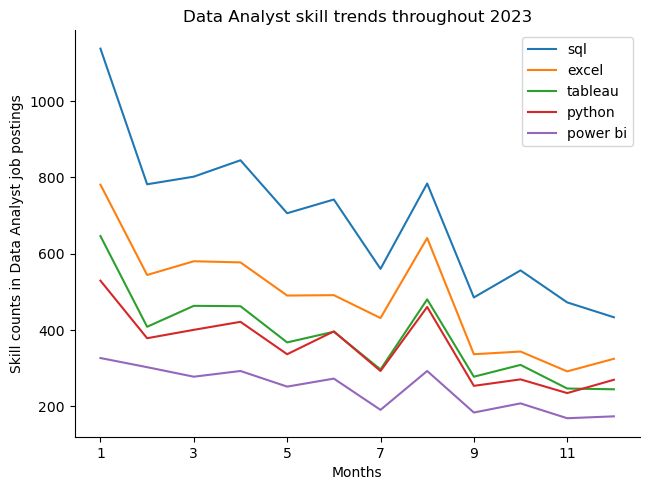

In [16]:
df_da_hu_piv.iloc[:, :5].plot(kind='line')
sns.despine()
ax=plt.gca()
ax.legend().set_visible(True)
plt.tight_layout()
plt.xlabel('Months')
plt.ylabel('Skill counts in Data Analyst job postings')
plt.title('Data Analyst skill trends throughout 2023')
plt.show()